<a href="https://colab.research.google.com/github/Zhuravlev-AD/statprac_homework/blob/main/4_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/datasets/flights.csv', low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# **1. Посмотрим на статистику отмены рейсов авиакомпаний и найдем аутсайдера**

In [19]:
unique_values = df['CANCELLATION_REASON'].unique()
unique_values

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

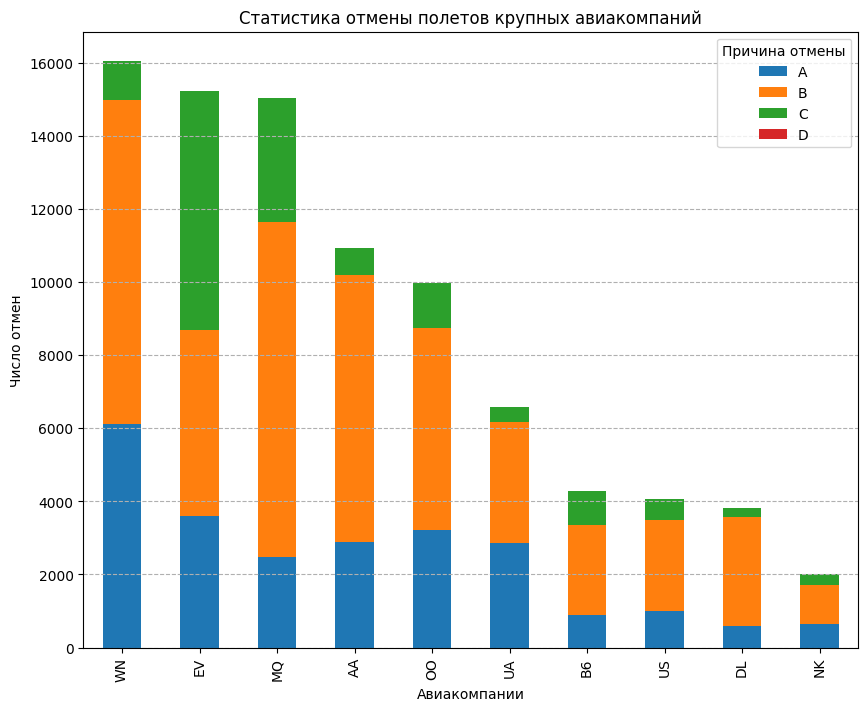

In [20]:
cancellation_reason_counts = df.groupby(['AIRLINE', 'CANCELLATION_REASON']).size().unstack().fillna(0)

cancellation_reason_counts['Total Cancellations'] = cancellation_reason_counts.sum(axis=1)

sorted_airlines = cancellation_reason_counts.sort_values(by='Total Cancellations', ascending=False)

top_airlines = sorted_airlines.head(10) #отберем 10 самых плохим авиакомпаний по числу отмененных рейсов
top_airlines.drop('Total Cancellations', axis=1).plot(kind='bar', stacked=True, figsize=(10, 8))

plt.title('Статистика отмены полетов крупных авиакомпаний')
plt.xlabel('Авиакомпании')
plt.ylabel('Число отмен')
plt.legend(title='Причина отмены')
plt.grid(axis='y', linestyle='--')
plt.show()

А теперь рассмотрим вероятность отмены рейсов для топ-10 авиакомпаний с наибольшим общим количеством рейсов

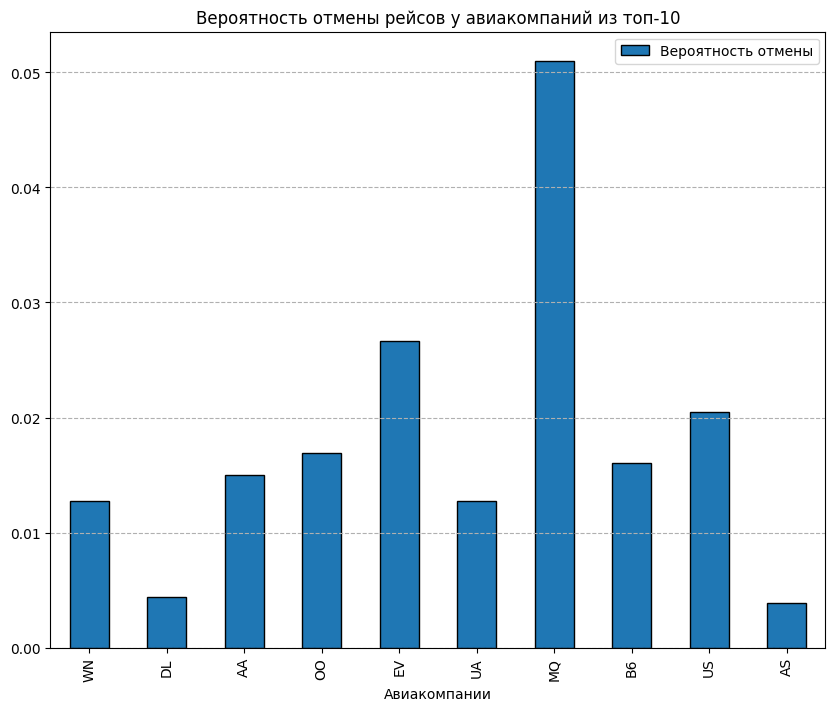

In [21]:
airline_counts = df.groupby('AIRLINE').size().sort_values(ascending=False)
top_airlines = airline_counts.head(10)

cancellation_counts = df[df['CANCELLATION_REASON'].notnull()].groupby('AIRLINE').size()
total_flight_counts = df.groupby('AIRLINE').size()

cancellation_data_true = pd.DataFrame({'Вероятность отмены': cancellation_counts/total_flight_counts}) # новый датафрейм с вероятностью отмены рейса
cancellation_data_true = cancellation_data_true.loc[top_airlines.index]


cancellation_data_true.plot(kind='bar', edgecolor = 'k', figsize=(10, 8))
plt.title ('Вероятность отмены рейсов у авиакомпаний из топ-10')
plt.xlabel('Авиакомпании')
plt.grid(axis='y', linestyle='--')
plt.show()

По первому графику лидером по отмененным рейсам оказалась авиакомпания WN, но по второму графику видно, что у этой компании в целом много рейсов. Зато видно, что у авиакомпании MQ самая большая вероятность отмены рейсов.

# 2. Посмотрим на зависимость задержки вылета от аэропорта отправления

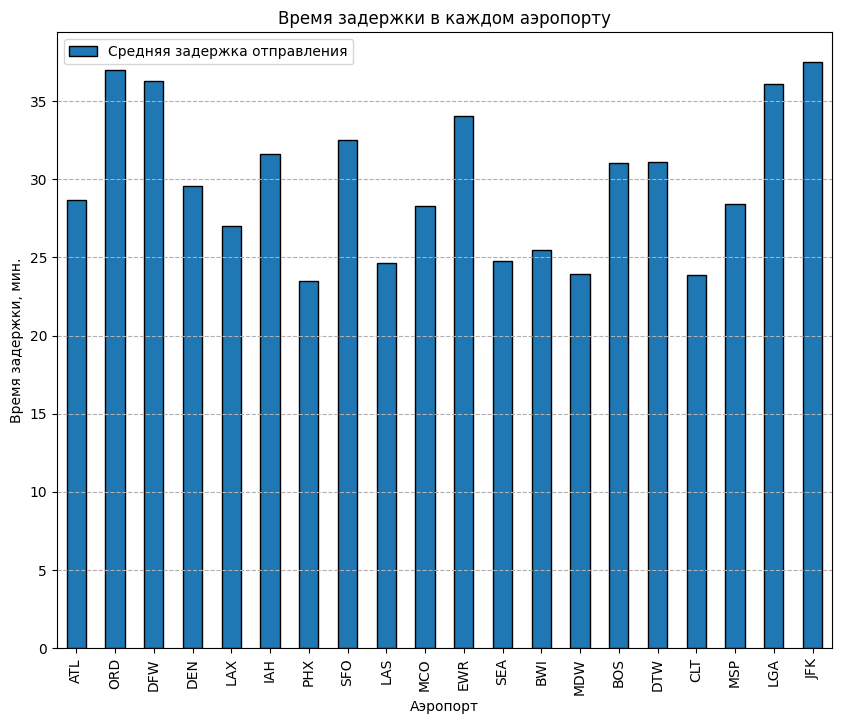

In [22]:
df = df.loc[(df.ORIGIN_AIRPORT.apply(len) == 3) &
            (df.DESTINATION_AIRPORT.apply(len) == 3)]  #отфильтруем от плохих названий аэропортов
df = df.loc[(df.DEPARTURE_DELAY >= 0)] #нас интересует неотрицательное время задержки рейса
airport_counts = df.groupby('ORIGIN_AIRPORT').size().sort_values(ascending=False) #посчитаем количество рейсов, чтобы понять загруженность аэропорта

top_airports = airport_counts.head(20) #возьмем топ из 20 аэропортов
average_delay = df.groupby('DESTINATION_AIRPORT')['DEPARTURE_DELAY'].mean()
delay_data = pd.DataFrame({'Средняя задержка отправления': average_delay})
delay_data = delay_data.loc[top_airports.index]
delay_data.plot(kind='bar', edgecolor = 'k', figsize=(10, 8))
plt.title ('Время задержки в каждом аэропорту')
plt.xlabel('Аэропорт')
plt.ylabel ('Время задержки, мин.')
plt.grid(axis='y', linestyle='--')
plt.show()

А теперь посчитаем среднее время задержки на рейс для каждого аэропорта из топ-20

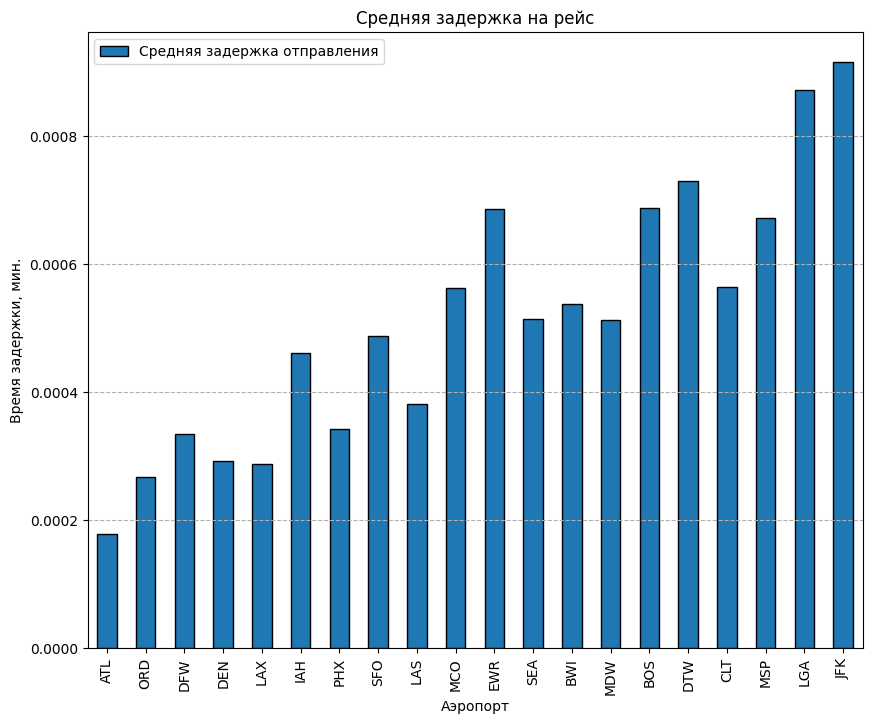

In [24]:
delay_data_true = pd.DataFrame({'Средняя задержка отправления': average_delay / airport_counts})
delay_data_true = delay_data_true.loc[top_airports.index]

delay_data_true.plot(kind='bar', edgecolor = 'k', figsize=(10, 8))
plt.title ('Средняя задержка на рейс')
plt.xlabel('Аэропорт')
plt.ylabel ('Время задержки, мин.')
plt.grid(axis='y', linestyle='--')
plt.show()

Из первого графика получили, что среднее время задержки в топ-20 аэропортах самое большое у JFK(Международный аэропорт имени Джона Кеннеди). Недалеко ушли ORD(Международный аэропорт О’Хара), DFW(Международный аэропорт Даллас/Форт-Уэрт) и LGA(аэропорт LaGuardia). Но если рассмотрим среднее время задержки на рейс, то получим, что JFK так же лидирует, а другие сильно отстали. Стоит развивать ближайшие незагруженные аэропорты для уменьшения пассажиро потока в перегруженных.

# 3. Посмотрим на статистику по причинам задержек

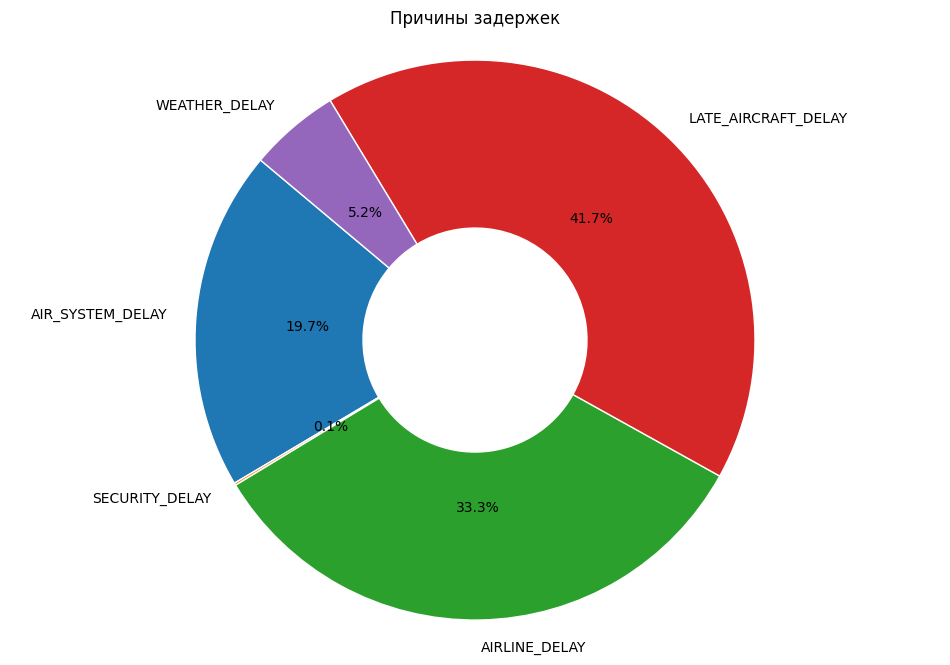

In [29]:
delay_reasons = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
frequency = df.loc[:, delay_reasons].sum()
plt.figure(figsize=(12, 8))
plt.pie(frequency, labels=delay_reasons, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.6, 'edgecolor': 'white'})
plt.axis('equal')
plt.title('Причины задержек')
plt.show()

Частые проблемы:

1.   проблемы с логистикой авиакомпаний или цепочкой перелётов
2.   задержки по вине авиакомпании (технические неисправности, недостаток экипажа и т.д.)

Требуется улучшение внутренних процессов авиакомпаний.

# 4. Посмотрим на пропускную способность аэропортов в разные дни недели

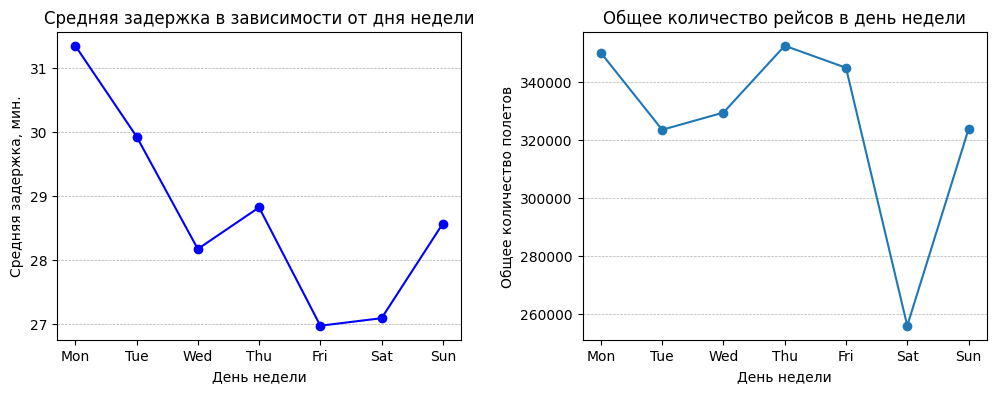

In [33]:
average_delay_by_day = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
flights_per_day = df['DAY_OF_WEEK'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
plt.plot(average_delay_by_day, 'b-', marker='o')
plt.title('Средняя задержка в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка, мин.')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(1, 8), day_names)

plt.subplot(122)
plt.plot(flights_per_day, marker='o')
plt.title('Общее количество рейсов в день недели')
plt.xlabel('День недели')
plt.ylabel('Общее количество полетов')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(1, 8), day_names)

plt.show()

Задержки растут к концу недели, достигая максимума в выходные.
Из возможных причин это увеличение пассажиропотока в выходные, сниженная пропускная способность аэропортов из-за ограниченного персонала.
Количество рейсов растет с середины недели, достигая пика в пятницу-субботу.

Пассажирам лучше летать в середине недели, а персоналу аэропортов забыть про выходные.

# 5. Посмотрим на задержки в зависимости от времени вылета

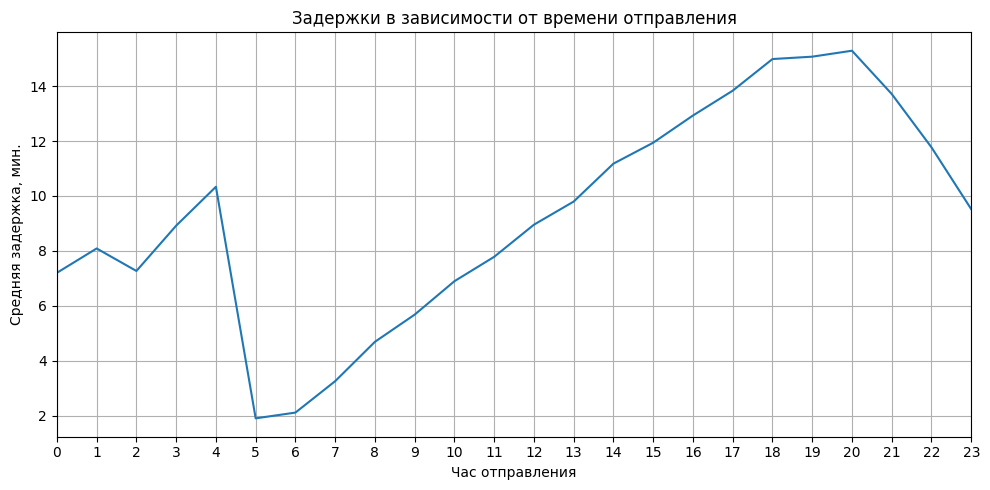

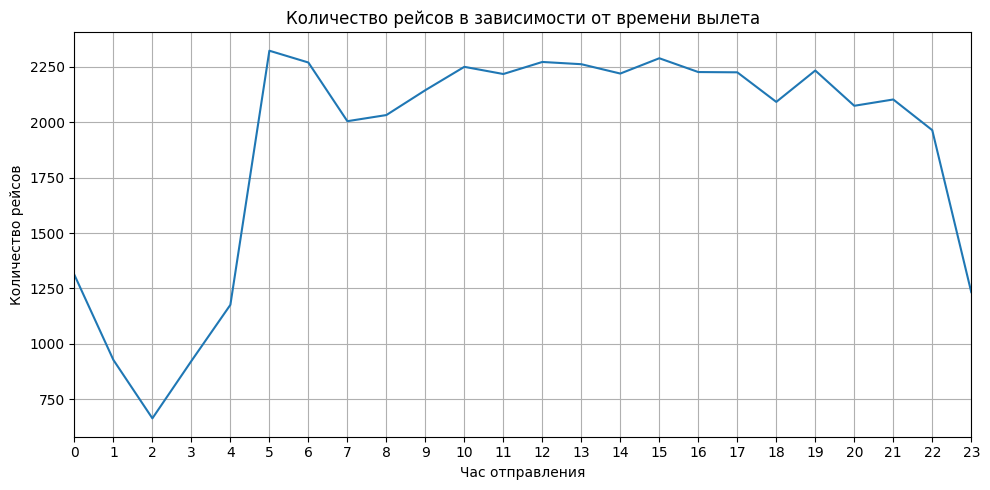

In [40]:
df['SCHEDULED_DEPARTURE_HOUR'] = df['SCHEDULED_DEPARTURE'] // 100
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='SCHEDULED_DEPARTURE_HOUR', y='DEPARTURE_DELAY', errorbar=None)
plt.title('Задержки в зависимости от времени отправления')
plt.xlabel('Час отправления')
plt.ylabel('Средняя задержка, мин.')
plt.xticks(range(0, 24))
plt.margins(x=0)
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='SCHEDULED_DEPARTURE_HOUR', y=df['FLIGHT_NUMBER'], errorbar=None)
plt.title('Количество рейсов в зависимости от времени вылета')
plt.xlabel('Час отправления')
plt.ylabel('Количество рейсов')
plt.xticks(range(0, 24))
plt.margins(x=0)
plt.tight_layout()
plt.grid(True)
plt.show()

Утром возможно накопление задержек из-за ночных технических работ.
А вечером увеличение времени задержек из-за влияния задержек предыдущих рейсов в течение всего дня.
Поэтому стоит добавить персонал в пиковые часы и увеличить интервалы между рейсами в вечерние часы.